In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [57]:
def logistic_cost(hx, y):
    return -np.mean((y * np.log(hx) + (1 - y) * np.log(1.00000001 - hx)))

In [58]:
def linear_cost(hx, y):
    return np.mean((hx - y) ** 2) / 2

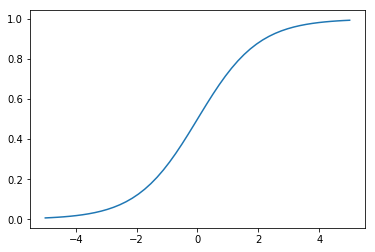

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
plt.plot(np.linspace(-5,5), sigmoid(np.linspace(-5,5)))
plt.show()

In [152]:
def regression(x, target, h, iters, lr, lbd=0.1, log=False, logInterval=100, init=None, cost=logistic_cost):
    samples, features = x.shape
    #xb: x with bias
    xb = np.column_stack((np.ones(shape=(x.shape[0])), x))
    features += 1
    theta = np.zeros(shape=(features, 1)) if init is None else init
    for i in range(iters):
        grad = np.zeros(shape=theta.shape)
        err = h(x, theta).reshape(samples, 1) - target
        for j in range(features):
            grad[j] = lr * np.sum(err * xb[:, j].reshape(samples,1)) / samples
            if j != 0:
                grad[j] += lr * lbd * theta[j] / samples
        theta -= grad
        if i % logInterval == 0 and log:
            print(cost(h(x, theta), target))
    return theta

In [153]:
def plot(X, Y):
    print(Y.shape)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    T = np.array([1 if e > 0.5 else 0 for e in Y])
#     plt.scatter(X[:,0], X[:,1], c=T)
#     plt.xlim(-3, 3)
#     plt.ylim(-3, 3)
#     plt.show()
    ax.scatter(X[:,0], X[:,1], X[:,2], c=T)
    plt.show()

In [159]:
def min_max_scaling(x):
    min_val = np.min(x, axis=0)
    max_val = np.max(x, axis=0)
    res = np.zeros(shape=x.shape)
    for i in range(len(min_val)):
        res[:, i] = (x[:, i] - min_val[i]) / (max_val[i] - min_val[i])
    return res

In [160]:
def z_score_scaling(x, mean_val=None, std_val=None):
    res = np.zeros(shape=x.shape)
    if mean_val is None:
        mean_val = np.mean(x, axis=0)
    if std_val is None:
        std_val = np.std(x, axis=0)
    for i in range(len(mean_val)):
        res[:, i] = (x[:, i] - mean_val[i]) / std_val[i]
    return (res, mean_val, std_val)

In [161]:
# Linear
linear_h = lambda x, theta : np.column_stack((np.ones(shape=x.shape[0]), x)).dot(theta)
# Logistic
h = lambda x, theta : 1/(1+np.exp(-(np.column_stack((np.ones(shape=x.shape[0]), x))).dot(theta)))

In [157]:
lr = 0.1
iters = 50000
# a = np.array([[1, 0.2], [1, 0.5], [1, 0.6], [1, 0.46], [1, 0.78]])
# y = np.array([[0], [1], [1], [0], [1]])
a = np.array([[np.random.rand(), np.random.rand()] for i in range(20000)])
y = np.array([[1 if e[1] > 0.5 else 0] for e in a])
the = regression(a, y, h, iters, lr)
print(the)
a = np.array([[np.random.rand(), np.random.rand()] for i in range(10000)])
y = np.array([[1 if e[1] > 0.5 else 0] for e in a])
res = h(a, the)
comp = [[y[i][0], 1 if res[i] > 0.5 else 0] for i in range(len(res))]
correct = 0
for a in comp:
    if a[0] == a[1]:
        correct += 1
print(correct / 10000)

[[-13.24792887]
 [ -0.06920953]
 [ 26.64201751]]
0.9982


(2000, 1)


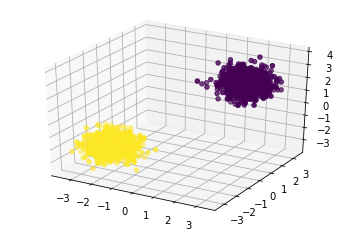

In [162]:
a = np.random.randn(2000, 3)
y = np.zeros(shape=(2000,1))
for i in range(2000):
    a[i, :] /= 2
    if np.random.rand() > 0.5:
        a[i, :] += 2
        y[i] = 0
    else:
        a[i, :] -= 2
        y[i] = 1
# y = np.array([1 if i < 1000 else 0 for i in range(2000)])
plot(a, y)

0.6634784193695293
0.17205806791393496
0.09314610592622444
0.06344953788925567
0.04806868731885251
0.03869675697508994
0.032396138500140594
0.02787184000412271
0.024466011052202034
0.02180954810638429
[[-0.00832917]
 [-0.68036524]
 [-0.67952373]
 [-0.67657317]]
[1 1 0 ... 1 1 1]
(2000, 1)


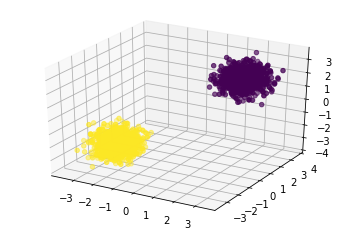

In [163]:
lr = 0.01
iters = 500
lbd = 0.1
test = np.random.randn(2000, 3)
for i in range(2000):
    test[i, :] /= 2
    if np.random.rand() > 0.5:
        test[i, :] += 2
    else:
        test[i, :] -= 2
the = regression(a, y, h, iters, lr, lbd, True, 50)
print(the)
result = h(test, the)
print(np.array([1 if e > 0.5 else 0 for e in result]))
plot(test, result)

0.6861126101905963
0.43612793651973275
0.30661762778894447
0.23220630859517594
[[-0.01077389]
 [-0.5526671 ]
 [-0.55296964]
 [-0.5528018 ]]
[[0.77940946]
 [0.81824046]
 [0.17725   ]
 ...
 [0.83633701]
 [0.81817059]
 [0.83243379]]
(2000, 1)


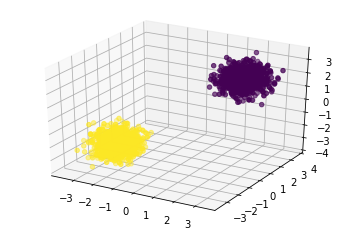

In [164]:
lr = 0.01
iters = 200
data, mean, std = z_score_scaling(a)
the = regression(data, y, h, iters, lr, lbd, True, 50)
print(the)
res = h(z_score_scaling(test, mean, std)[0], the)
print(res)
plot(test, res)

0.6866295647586155
0.4227518961556061
[[ 1.5037846 ]
 [-1.27332912]
 [-1.34856235]
 [-1.17019033]]
(2000, 1)


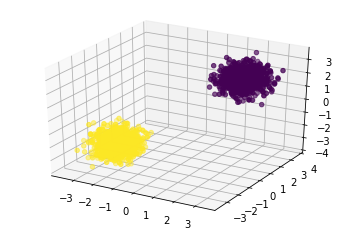

In [165]:
# #Doesn't work
lr = 0.1
iters = 200
the = regression(min_max_scaling(a), y, h, iters, lr, True, 20)
print(the)
result = h(min_max_scaling(test), the)
plot(test, result)

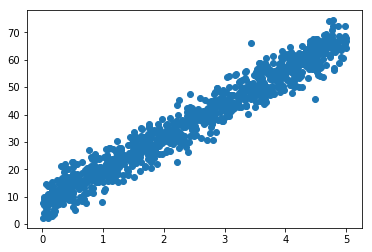

In [78]:
x = np.random.rand(1000, 1) * 5
noise = np.random.randn(1000, 1) * 4
y = x * 12 + 8 + noise
plt.scatter(x, y)
plt.show()

733.500618688616
7.711151610879082
7.537306025432896
7.519457937607931
7.517640286633898
7.517459928791601
[[ 7.91252387]
 [11.96270778]]


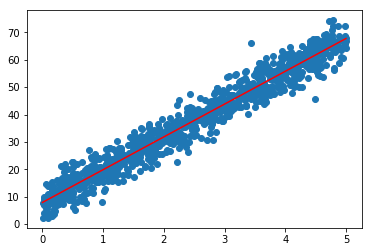

In [81]:
iters = 3000
lr = 0.01
the = regression(x, y, linear_h, iters, lr, cost=linear_cost, log=True, logInterval=500)
test = np.linspace(0, 5)
test_y = linear_h(test, the)
print(the)
plt.scatter(x, y)
plt.plot(test, test_y, c=[1, 0, 0])
plt.show()

### Using Pytorch 

In [24]:
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F

In [25]:
class Net(nn.Module):
    def __init__(self, features, hiddens, outputs=2):
        super(Net, self).__init__()
        self.hidden = nn.Linear(features, hiddens)
        self.out = nn.Linear(hiddens, outputs)
        
    def forward(self, x):
        o1 = self.hidden(x)
        return self.out(o1)

In [42]:
net = Net(3, 20, 2)

In [43]:
optimizer = optim.Adam(net.parameters(), lr=0.01)
loss_func = nn.CrossEntropyLoss()

In [ ]:
a = np.random.randn(2000, 3)
y = np.zeros(shape=(2000,1))
for i in range(2000):
    a[i, :] /= 2
    if np.random.rand() > 0.5:
        a[i, :] += 2
        y[i] = 0
    else:
        a[i, :] -= 2
        y[i] = 1

In [46]:
EPOCH = 10
for t in range(EPOCH):
    o = net(torch.Tensor(a))
    loss = loss_func(o, torch.Tensor(y).long().squeeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

(2000, 1)


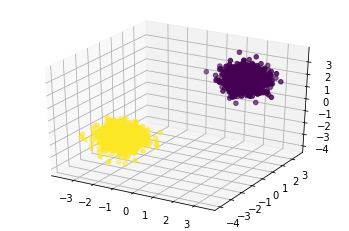

In [47]:
test = np.random.randn(2000, 3)
for i in range(2000):
    test[i, :] /= 2
    if np.random.rand() > 0.5:
        test[i, :] += 2
    else:
        test[i, :] -= 2
result = net(torch.Tensor(test))
plot(test, torch.max(result, 1)[1].numpy().reshape(2000,1))

In [40]:
lr = 0.1
iters = 50000
# a = np.array([[1, 0.2], [1, 0.5], [1, 0.6], [1, 0.46], [1, 0.78]])
# y = np.array([[0], [1], [1], [0], [1]])
a = torch.Tensor(np.array([[np.random.rand(), np.random.rand()] for i in range(20000)]))
y = torch.Tensor(np.array([[1 if e[1] > 0.5 else 0] for e in a]))
net = Net(2, 18, 2)
optimizer = optim.Adam(net.parameters(), lr=0.1)
loss_func = nn.CrossEntropyLoss()
EPOCH = 1000
for t in range(EPOCH):
    o = net(torch.Tensor(a))
    loss = loss_func(o, torch.Tensor(y).long().squeeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



In [41]:
a = torch.Tensor(np.array([[np.random.rand(), np.random.rand()] for i in range(10000)]))
y = np.array([[1 if e[1] > 0.5 else 0] for e in a])
res = net(a)
comp = [[y[i][0].item(), torch.max(res, 1)[1][i].item()] for i in range(len(res))]
correct = 0
for a in comp:
    if a[0] == a[1]:
        correct += 1
print(correct / 10000)

0.9998


In [133]:
net = Net(1, 4, 1)
optimizer = optim.Adam(net.parameters(), lr=0.1)
loss_func = nn.MSELoss()

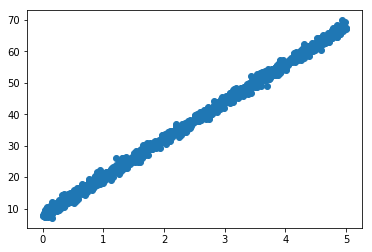

In [134]:
x = np.random.rand(1000, 1) * 5
noise = np.random.randn(1000, 1)
y = x * 12 + 8 + noise
plt.scatter(x, y)
plt.show()

In [135]:
EPOCH = 200
for t in range(EPOCH):
    o = net(torch.Tensor(x) / 5)
    loss = loss_func(o, torch.Tensor(y).squeeze(1) / 60)
    print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

tensor(0.6456, grad_fn=<MseLossBackward>)
tensor(0.1234, grad_fn=<MseLossBackward>)
tensor(0.2009, grad_fn=<MseLossBackward>)
tensor(0.3193, grad_fn=<MseLossBackward>)
tensor(0.2239, grad_fn=<MseLossBackward>)
tensor(0.1142, grad_fn=<MseLossBackward>)
tensor(0.0836, grad_fn=<MseLossBackward>)
tensor(0.1129, grad_fn=<MseLossBackward>)
tensor(0.1510, grad_fn=<MseLossBackward>)
tensor(0.1666, grad_fn=<MseLossBackward>)
tensor(0.1558, grad_fn=<MseLossBackward>)
tensor(0.1294, grad_fn=<MseLossBackward>)
tensor(0.1021, grad_fn=<MseLossBackward>)
tensor(0.0856, grad_fn=<MseLossBackward>)
tensor(0.0847, grad_fn=<MseLossBackward>)
tensor(0.0958, grad_fn=<MseLossBackward>)
tensor(0.1091, grad_fn=<MseLossBackward>)
tensor(0.1154, grad_fn=<MseLossBackward>)
tensor(0.1115, grad_fn=<MseLossBackward>)
tensor(0.1010, grad_fn=<MseLossBackward>)
tensor(0.0905, grad_fn=<MseLossBackward>)
tensor(0.0847, grad_fn=<MseLossBackward>)
tensor(0.0849, grad_fn=<MseLossBackward>)
tensor(0.0890, grad_fn=<MseLossBac

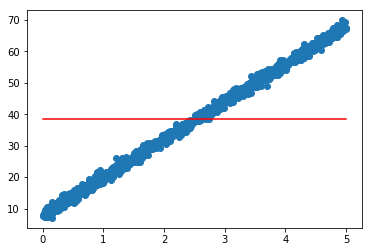

In [139]:
test = np.linspace(0, 5)
with torch.no_grad():
    net.eval()
    test_y = net(torch.Tensor(test).view(len(test), 1) / 5) * 60
    plt.scatter(x, y)
    plt.plot(test, test_y.numpy(), c=[1, 0, 0])
    plt.show()